# COMP 562 Final Project Analysis

#### Authors:
Cooper Lee, James Tuong, Nathaniel Turner, Alan Vasquez

In [15]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
# %pip install mlxtend --quiet
from sklearn.model_selection import train_test_split
import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# import sklearn #need to figure out what parts of sklearn to import that we'll use

Loading in the dataset and splitting into test and training set (may want to do each time for the different methods)

In [2]:
dpath = "data/heart.csv"
feature_names = ["age","sex","cp","trtbps","chol","fbs","restecg","thalachh",
                                 "exng","oldpeak","slp","caa","thall", "output"]

data = np.genfromtxt(dpath, delimiter=",", skip_header=1, names=feature_names)

heart_data = np.array([data[i] for i in feature_names[:-1]]).T
heart_attack_odds = data["output"]

In [5]:
DataFrame = pd.DataFrame(data).head()
DataFrame

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(heart_data, heart_attack_odds, test_size=0.3,
                                                    random_state=1, stratify=heart_attack_odds)

## Method 1: Binary Tree

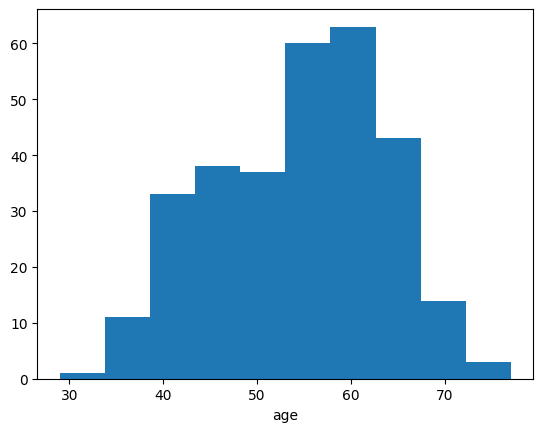

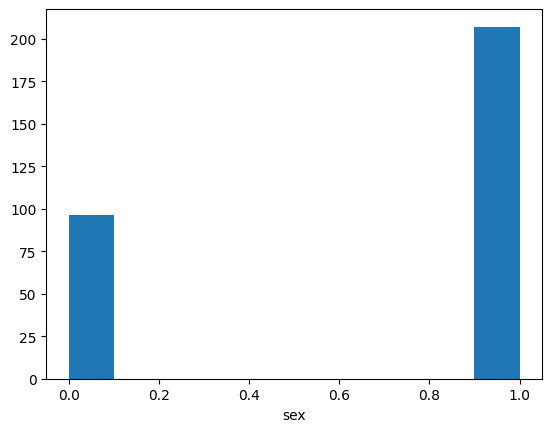

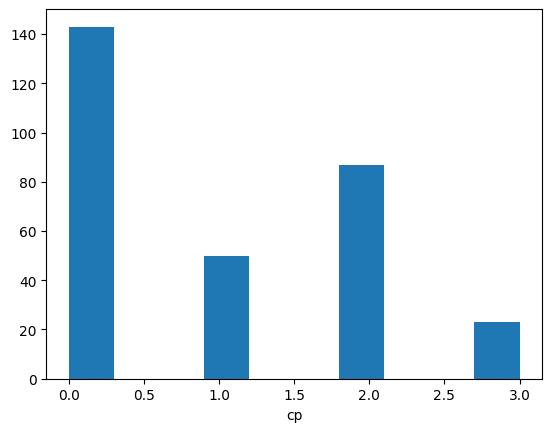

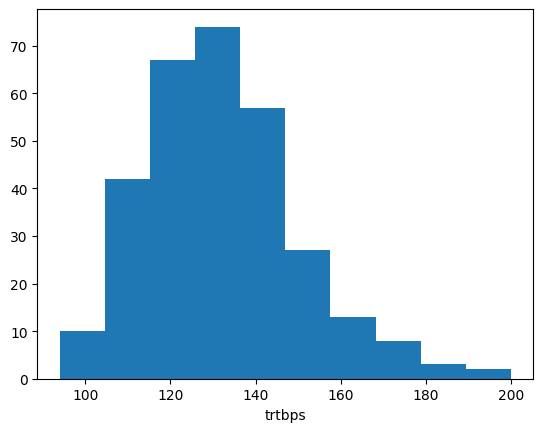

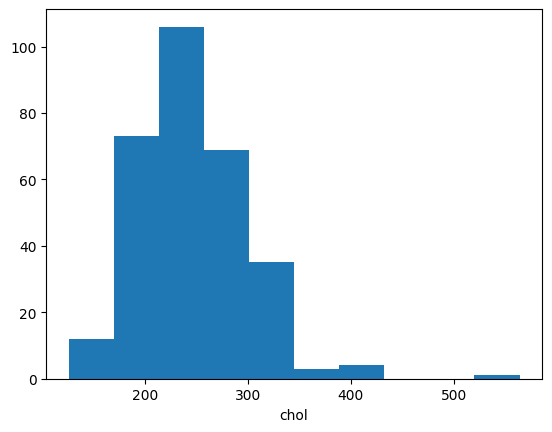

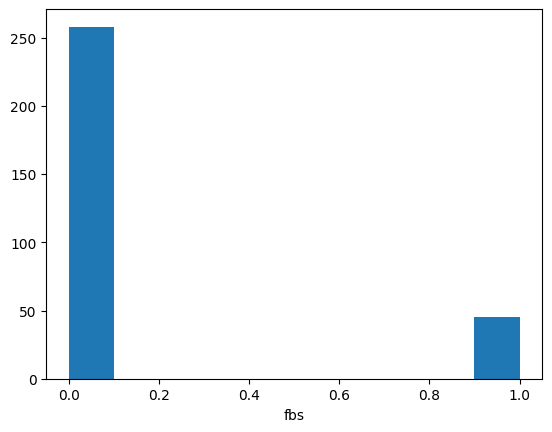

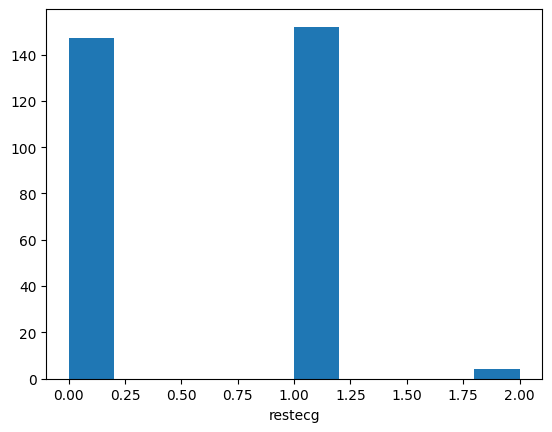

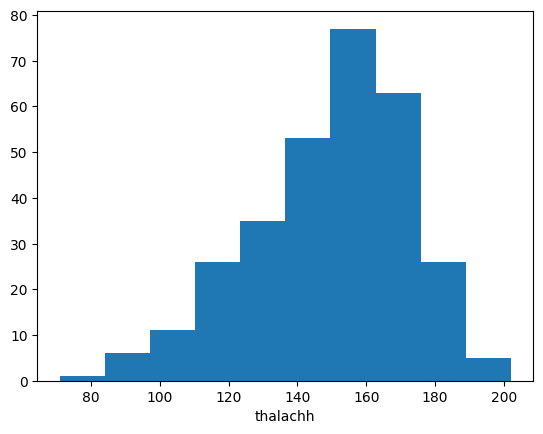

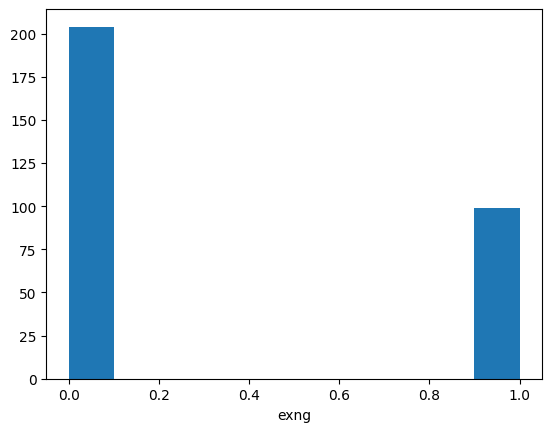

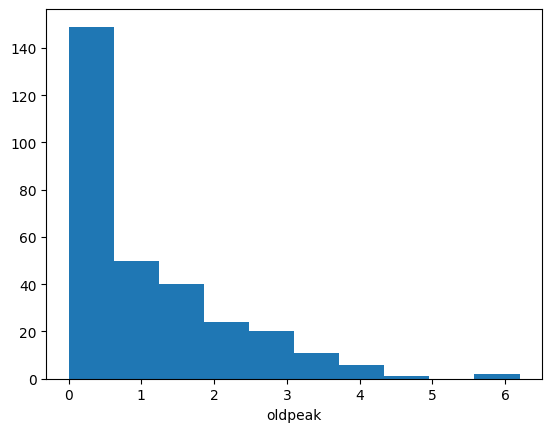

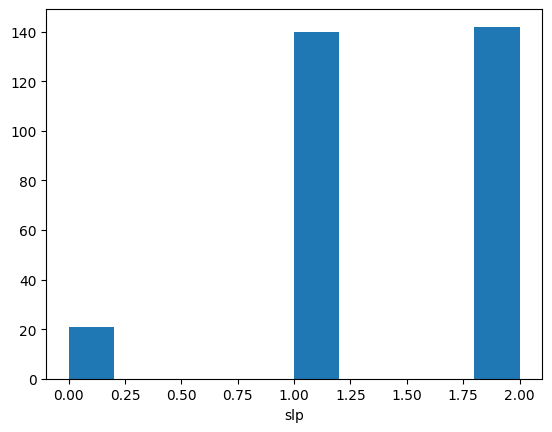

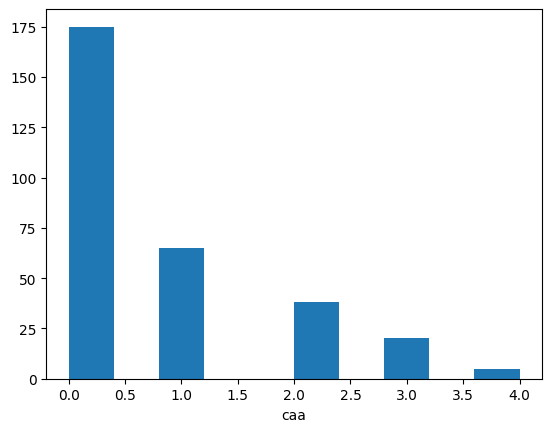

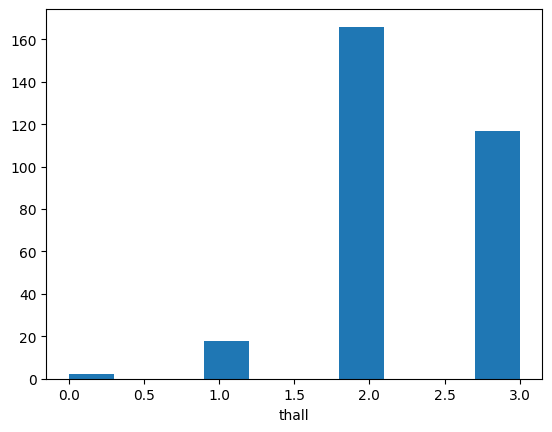

In [7]:
for i in range(len(feature_names)-1):
    plt.figure()
    plt.hist(heart_data[:,i])
    plt.xlabel(feature_names[i])

In [16]:
# Create Decision Tree classifer object
clf_binary_tree = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_binary_tree = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_binary_tree = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_binary_tree))

Accuracy: 0.8571428571428571


## Method 2: Random Forest

In [8]:
forest = RandomForestClassifier(criterion='gini',
                                 max_depth = 8,
                                 n_estimators=10,
                                 random_state=4,
                                 n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=10, n_jobs=2, random_state=4)

In [9]:
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.868


## Method 3: Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train, y_train)
clf.predict(X_test)

clf.predict_proba(X_test)


clf.score(X_test, y_test)

0.8571428571428571

/Users/alanvasquez/Library/Caches/pypoetry/virtualenvs/notebooks-NJoOPTzh-py3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


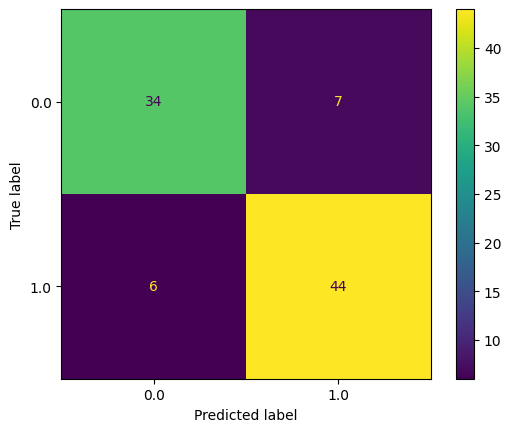

In [11]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()